### Script to check if IS correlates with
1. euclidean similairies between GE profiles of CLs
2. averaged median GE across ccle andg gdsc common cell lines

In [1]:
__author__ = 'Aanchal'

In [2]:
import pandas as pd
import FUNCTIONS as f
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
high_dispersion_genes='True'

In [5]:
if(high_dispersion_genes):
    plotting_df=pd.read_csv('../data_processed/InconsistencyFactorAnalysis/expression_anaysis_withHighDispGenes.csv')


plotting_df_cl=plotting_df.groupby('Standard cell line name')['IS','mae_fitness','euclidean','correlation','cosine','med GE ccle','med GE gdsc','ic50_mode'].median()
plotting_df_cl.rename(columns={'IS': 'median IS','mae_fitness': 'median mae_fitness'}, inplace=True)


In [6]:
len(plotting_df_cl)

352

In [7]:
plotting_df['Metrics to measure similarity between GE profiles']=0*len(plotting_df)
plotting_df_cl['Metrics to measure similarity between GE profiles']=0*len(plotting_df)

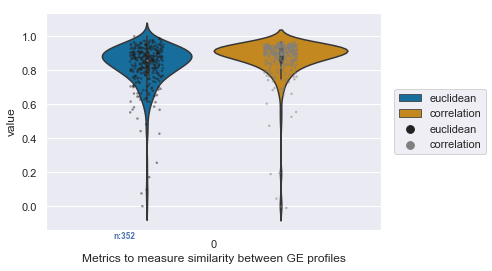

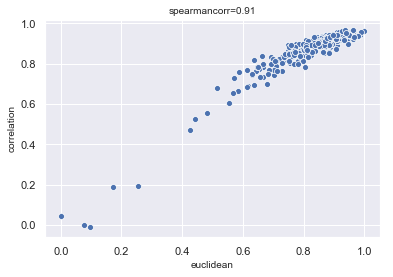

In [8]:
f.clusteringBoxplot(plotting_df_cl, 'Metrics to measure similarity between GE profiles', ['euclidean','correlation'],'',-0.2,1)
plt.show()
corr=f.plotVectorsGetCorr_seaborn('euclidean','correlation',plotting_df_cl,'spearman' )
#corr=f.plotVectorsGetCorr_seaborn('correlation','cosine',plotting_df_cl,'spearman' )

Text(0.5, 1.0, 'spearman r=0.91')

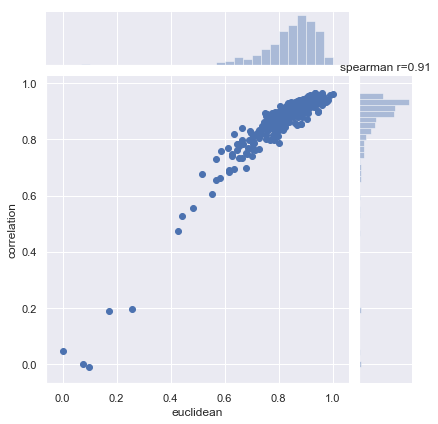

In [9]:
sns.jointplot('euclidean','correlation',plotting_df_cl)
plt.title('spearman r='+str(plotting_df_cl['euclidean'].corr(plotting_df_cl['correlation'],method='spearman').round(2)))

0.8631177691115896

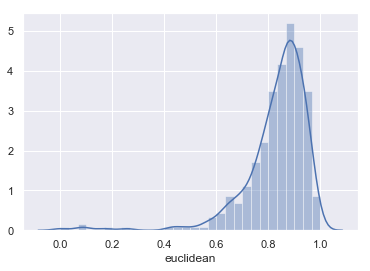

In [10]:
#f.clusteringBoxplot(plotting_df, 'Metrics to measure similarity between mutation profiles', 'IS','',-0.25,1)

sns.distplot(plotting_df_cl['euclidean'])
#f.clusteringBoxplot(plotting_df_cl, 'Metrics to measure similarity between mutation profiles', 'euclidean','',-0.25,1)
np.median(plotting_df['euclidean'])

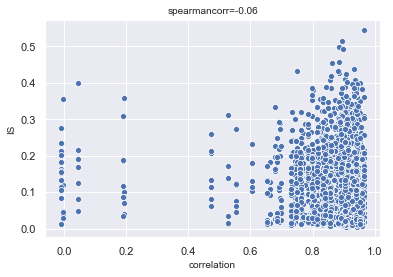

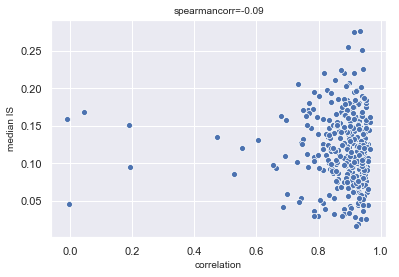

In [11]:
corr=f.plotVectorsGetCorr_seaborn('correlation','IS',plotting_df,'spearman' )
plt.show()
corr=f.plotVectorsGetCorr_seaborn('correlation','median IS',plotting_df_cl,'spearman' )

Paclitaxel : 0.01
Tanespimycin : -0.03
PD0325901 : -0.02
NVP-TAE684 : -0.1
Palbociclib : 0.06
Crizotinib : 0.08
Erlotinib : -0.18
Lapatinib : -0.14
Nilotinib : 0.04
PHA-665752 : 0.05
Saracatinib : -0.22
Sorafenib : -0.03
Selumetinib : -0.13
Nutlin-3a : -0.07
PLX-4720 : 0.05


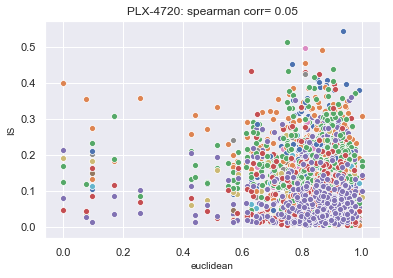

In [12]:
dname_list=['Paclitaxel', 'Tanespimycin', 'PD0325901', 'NVP-TAE684','Palbociclib', 'Crizotinib','Erlotinib','Lapatinib','Nilotinib','PHA-665752','Saracatinib','Sorafenib','Selumetinib', 'Nutlin-3a','PLX-4720']
#dname_list=['Paclitaxel', 'Tanespimycin', 'PD0325901']

for i in range(len(dname_list)):
    
    dname=dname_list[i]#'Paclitaxel'
    
    temp=plotting_df[plotting_df['Standard drug name']==dname]

    corr=f.plotVectorsGetCorr_seaborn('euclidean','IS',temp,'spearman' )
    plt.title(dname+": spearman corr= "+str(corr))
    print(dname+" : "+str(corr))

#### Checking if absolute value of GE is causing inconsistency

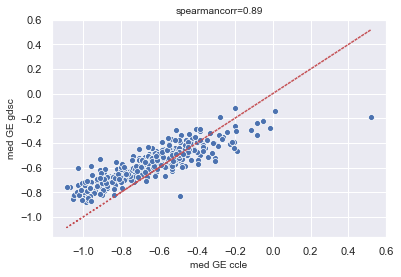

In [14]:
#Corr between no of mutatuions in CCLE and GDSC
corr=f.plotVectorsGetCorr_seaborn('med GE ccle','med GE gdsc',plotting_df_cl,'spearman' )
plt.plot( plotting_df_cl['med GE ccle'],plotting_df_cl['med GE ccle'], color='r', linestyle=':')

In [15]:
plotting_df_cl[(plotting_df_cl['med GE ccle']>-0.6) & (plotting_df_cl['med GE gdsc']<-0.8)]
plotting_df_cl[plotting_df_cl['med GE ccle']>0.5 ]

,median IS,median mae_fitness,euclidean,correlation,cosine,med GE ccle,med GE gdsc,ic50_mode,Metrics to measure similarity between GE profiles
Standard cell line name,,,,,,,,,
SU8686,0.030487,0.128395,0.645502,0.783814,0.809574,0.518783,-0.191364,10.165114,0


In [16]:
plotting_df_cl['med GE']= (plotting_df_cl['med GE ccle'] + plotting_df_cl['med GE gdsc'])/2
plotting_df['med GE']= (plotting_df['med GE ccle'] + plotting_df['med GE gdsc'])/2

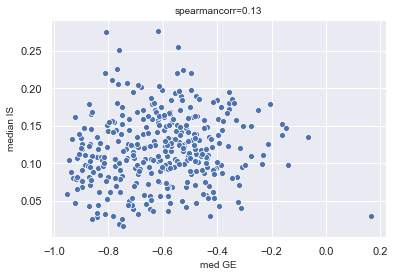

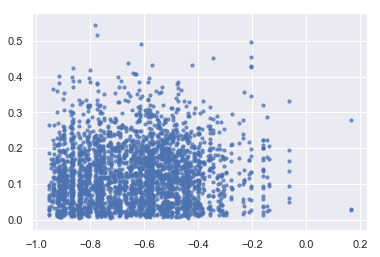

In [17]:
corr=f.plotVectorsGetCorr_seaborn('med GE','median IS',plotting_df_cl,'spearman' )
plt.show()

plt.scatter(plotting_df['med GE'] , plotting_df['IS'],s=10, alpha=0.7)



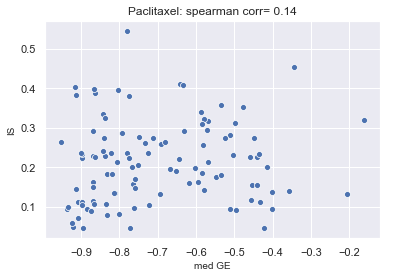

Paclitaxel : 0.14


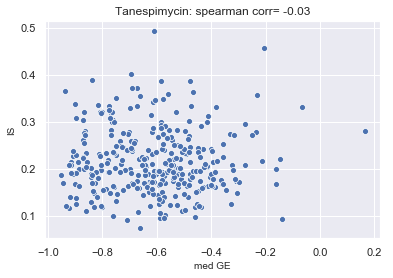

Tanespimycin : -0.03


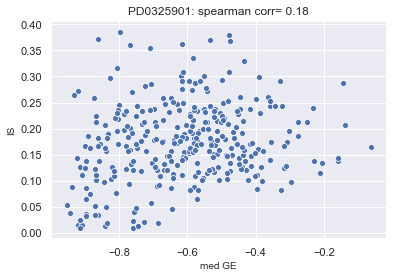

PD0325901 : 0.18


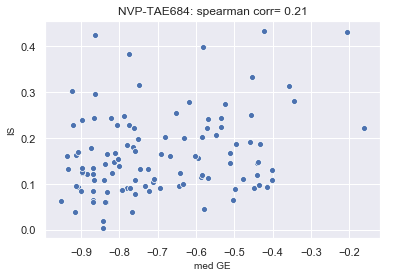

NVP-TAE684 : 0.21


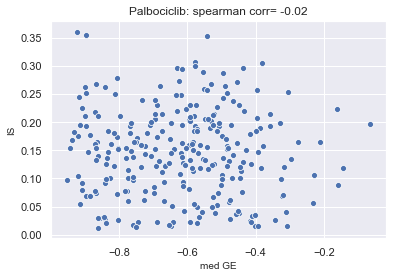

Palbociclib : -0.02


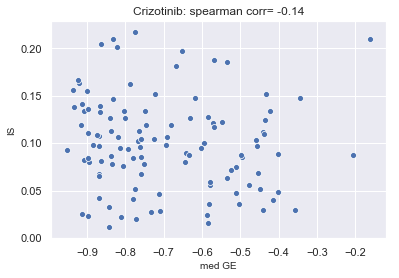

Crizotinib : -0.14


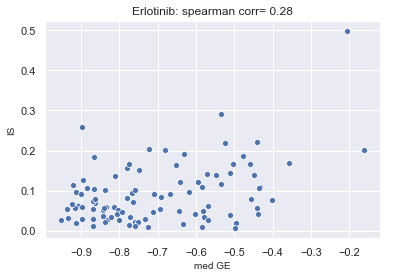

Erlotinib : 0.28


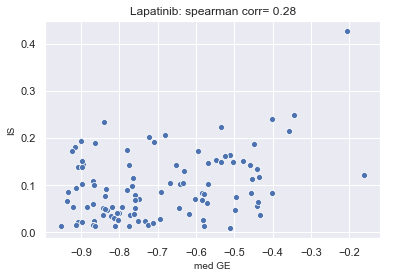

Lapatinib : 0.28


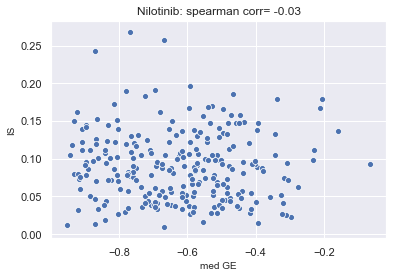

Nilotinib : -0.03


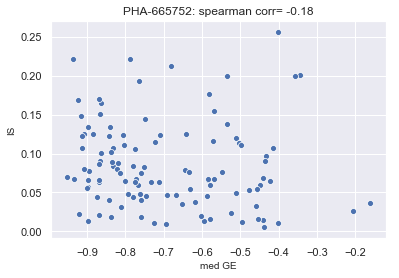

PHA-665752 : -0.18


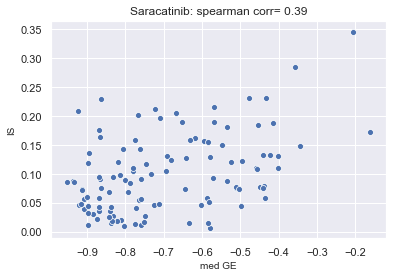

Saracatinib : 0.39


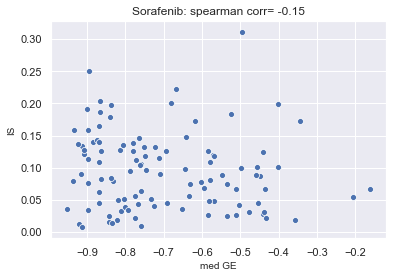

Sorafenib : -0.15


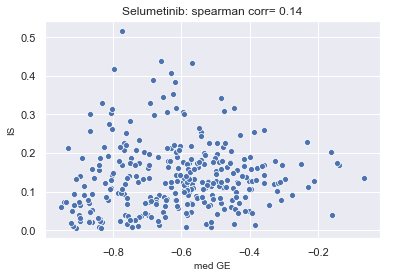

Selumetinib : 0.14


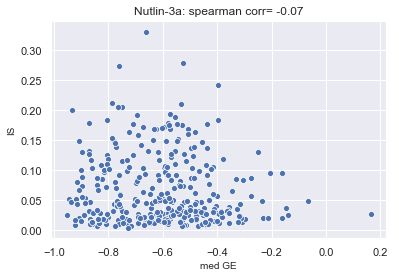

Nutlin-3a : -0.07


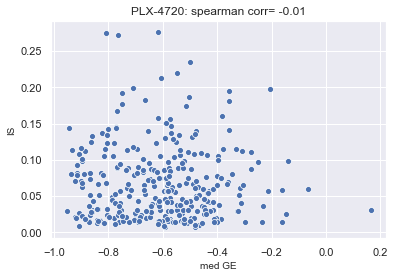

PLX-4720 : -0.01


In [18]:
dname_list=['Paclitaxel', 'Tanespimycin', 'PD0325901', 'NVP-TAE684','Palbociclib', 'Crizotinib','Erlotinib','Lapatinib','Nilotinib','PHA-665752','Saracatinib','Sorafenib','Selumetinib', 'Nutlin-3a','PLX-4720']
#dname_list=['Paclitaxel', 'Lapatinib']
for i in range(len(dname_list)):
    
    dname=dname_list[i]#'Paclitaxel'
    
    temp=plotting_df[plotting_df['Standard drug name']==dname]
    corr=f.plotVectorsGetCorr_seaborn('med GE','IS',temp,'spearman' )
    plt.title(dname+": spearman corr= "+str(corr))
    plt.show()
    print(dname+" : "+str(corr)) 